In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [2]:
df=pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()/df.shape[0]

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [7]:
df.duplicated().any()

True

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
def count_plot(column_name,hue=None,rotation=0):
    graph=sns.countplot(x=column_name,data=df,hue=hue,order=df[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
    plt.xticks()
    plt.show()

In [10]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
     sns.catplot(x = x_axis, y = y_axis, data = df, hue = hue, kind = "box", col = col)
     plt.xlabel(x_axis)
     plt.ylabel("FRQ")
     plt.show()

In [11]:
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

In [12]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

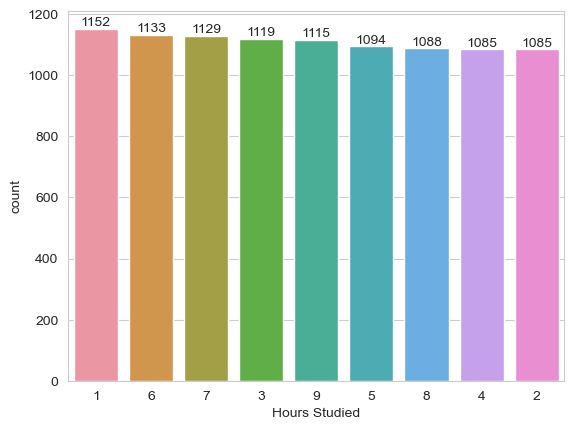

In [13]:
count_plot(column_name = "Hours Studied")

Most student studied "1"hour

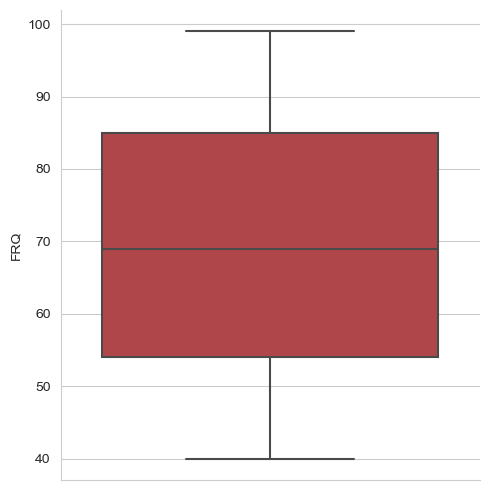

In [14]:
box_plot(y_axis="Previous Scores")

50 % of students scored above 65

No student obtained the final grade

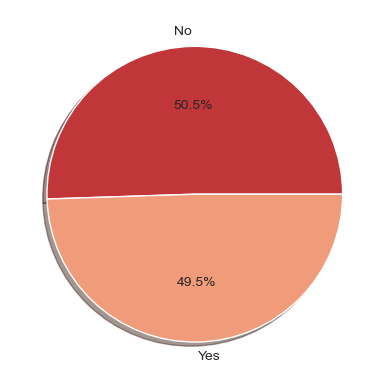

In [15]:
plt.pie(df["Extracurricular Activities"].value_counts(), labels = df["Extracurricular Activities"].value_counts().index, 
        shadow = True, autopct = "%1.1f%%")
plt.show()


Most student "don't" participate in extracurriculum activities 

In [16]:
df["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

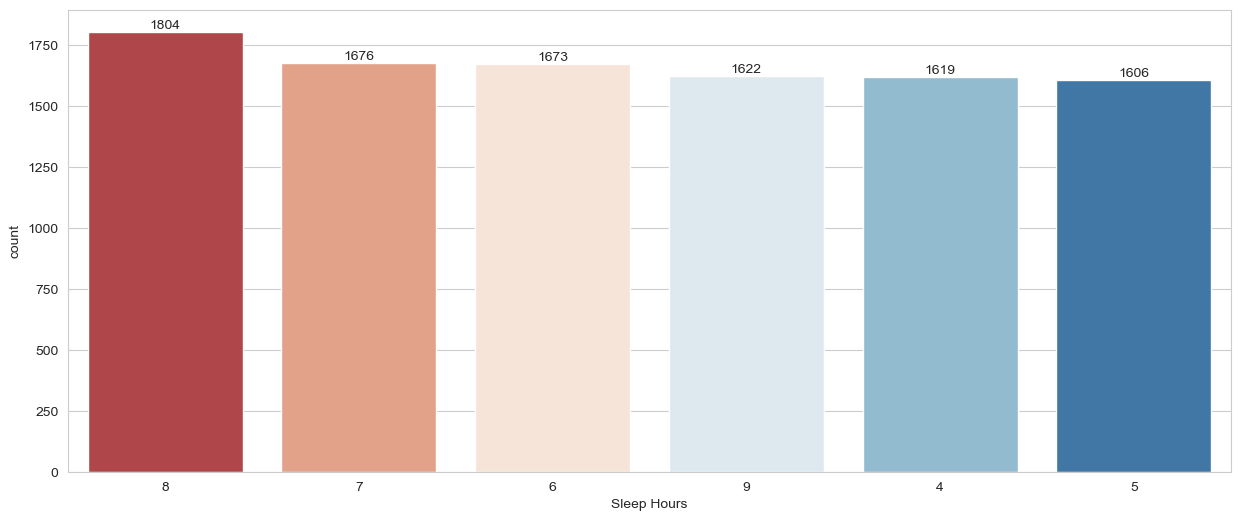

In [17]:
plt.figure(figsize=(15,6))
count_plot(column_name="Sleep Hours")

Most student Sleep 8 hours
Other students sleep Similar numbers of hours

In [19]:
df["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7], dtype=int64)

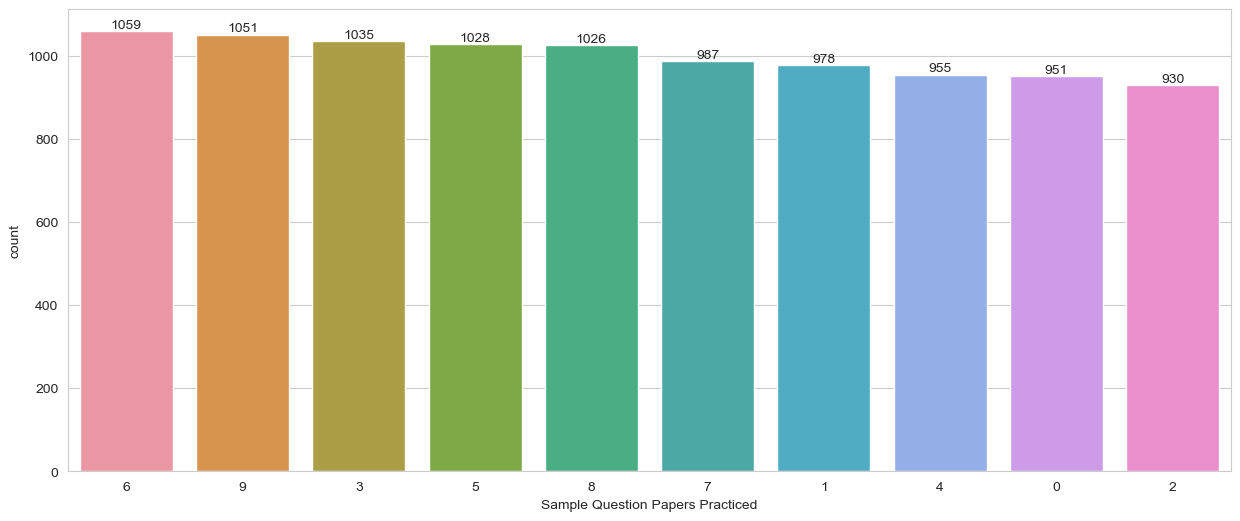

In [20]:
plt.figure(figsize=(15,6))
count_plot(column_name="Sample Question Papers Practiced")

All student have Similar The number of sample question papers the practiced.
There are students who did not practice any questions


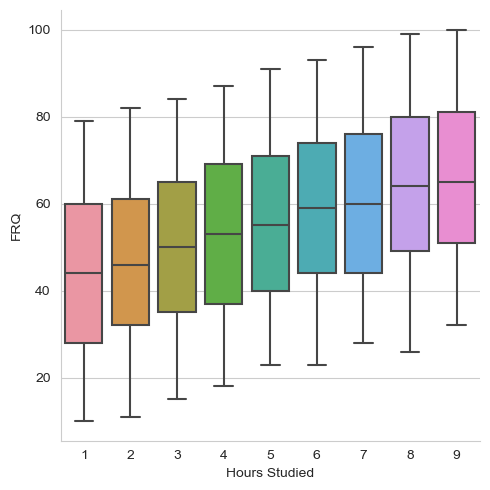

In [21]:
box_plot(x_axis = "Hours Studied", y_axis = "Performance Index")

As we can see, the more hours you study, the greater the success rate

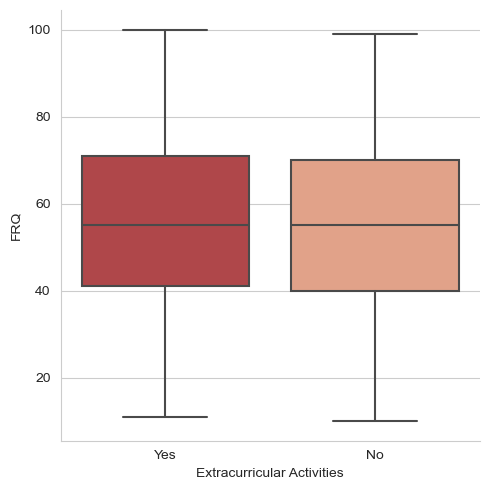

In [22]:
box_plot(x_axis = "Extracurricular Activities", y_axis = "Performance Index")

Participation in extracurricular activities helps to a very small extent in obtaining high grades

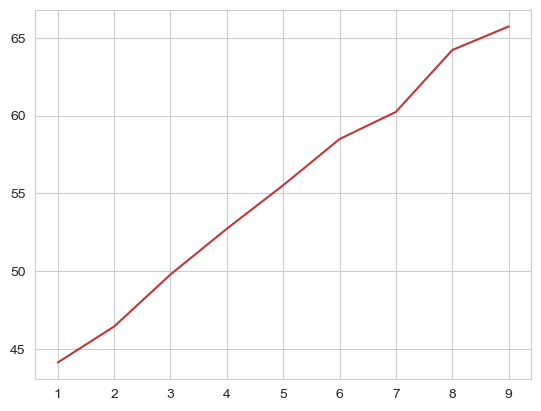

In [24]:
avg_performance_by_hours = df.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

The more hours you sleep, Performance index increase

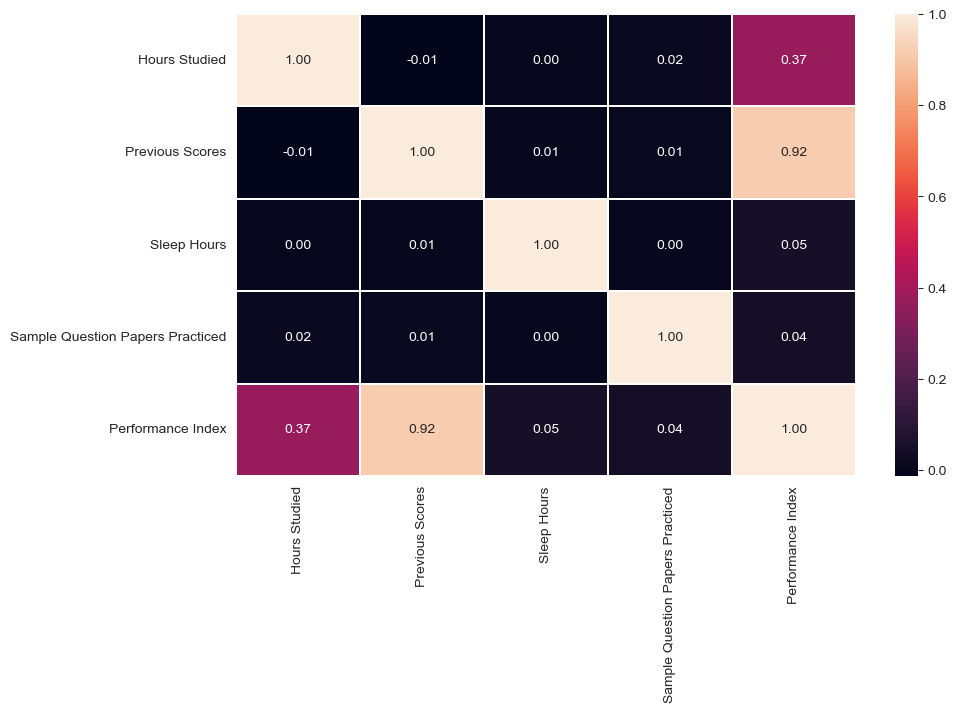

In [27]:
plt.figure(figsize = (10,6))
sns.heatmap(df.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

There's a lot of Strong Positive Relationships between Performance Index and Features

In [28]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [31]:
encoder = LabelEncoder()

df["Extracurricular Activities"] =  encoder.fit_transform(df["Extracurricular Activities"])

In [32]:
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
4958,1,96,0,9,6,75.0
2895,5,68,0,5,6,53.0
3052,7,50,0,5,6,42.0
8346,3,47,1,4,5,28.0
6403,8,46,1,8,8,41.0


In [34]:
# Splitting data into Indipendent and Dependent Variable

Train = df.drop(columns = "Performance Index")
Target = df["Performance Index"]

In [36]:
Train.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
1722,4,97,1,8,0
3040,9,99,1,8,6
5482,1,57,0,5,0


In [37]:
Target

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [40]:
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train,y_train)

LinearRegression()

In [43]:
model.score(X_train, y_train)

0.9886898790682355

In [44]:

predict = np.round(model.predict(X_test), decimals = 1)

In [45]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


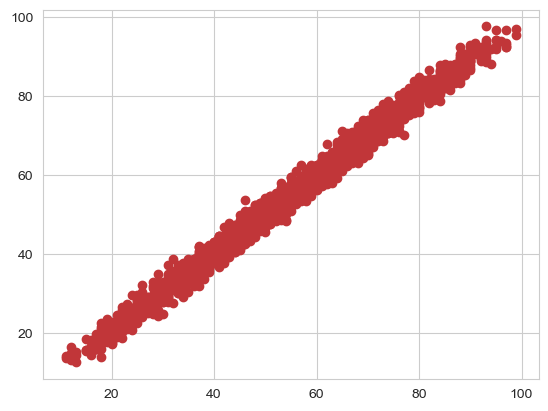

In [46]:
plt.scatter(y_test, predict)
plt.show()

In [47]:
mean_absolute_error(y_test,predict)

1.612

In [48]:

r2_score(y_test,predict)

0.9889704960519785

In [50]:
model.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [51]:

model.intercept_

-33.92194621555628

In [52]:
import pickle

In [53]:
with open("stud_perfo_model.pickle",'wb')as f:
    pickle.dump(model,f)